<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Multiple_Linear_Regression_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Menyiapkan Library yang digunakan

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Menyiapkan dan melihat data

In [153]:
df = pd.read_excel('https://github.com/alfianpr/perhitungan-volume-objek-simetri/raw/main/telur_clean.xlsx', usecols=['pixel', 'volume', 'jarak'])
print('5 data teratas :')
print(df.head())
print('Jumlah kolom dan baris dari data :', df.shape)
print('informasi data :')
print(df.info())
print('data statistik :')
print(df.describe())

5 data teratas :
   pixel   volume  jarak
0  57378  0.00006  0.307
1  53078  0.00005  0.307
2  60613  0.00006  0.307
3  53295  0.00005  0.307
4  44062  0.00004  0.307
Jumlah kolom dan baris dari data : (80, 3)
informasi data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pixel   80 non-null     int64  
 1   volume  80 non-null     float64
 2   jarak   80 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB
None
data statistik :
              pixel     volume      jarak
count     80.000000  80.000000  80.000000
mean   54154.575000   0.000054   0.308888
std     4354.322278   0.000006   0.007209
min    44062.000000   0.000040   0.297000
25%    52074.000000   0.000050   0.307000
50%    53681.500000   0.000055   0.310000
75%    56909.000000   0.000060   0.316000
max    66614.000000   0.000075   0.316000


## Cek missing value

In [154]:
#Mencari dan menangani missing values
df.isnull().sum()

pixel     0
volume    0
jarak     0
dtype: int64

## Exploratory Data Analysis

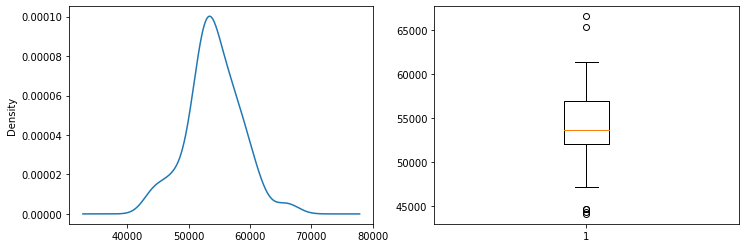

In [155]:
#Univariate analysis pixel

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['pixel'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['pixel'])

plt.show()

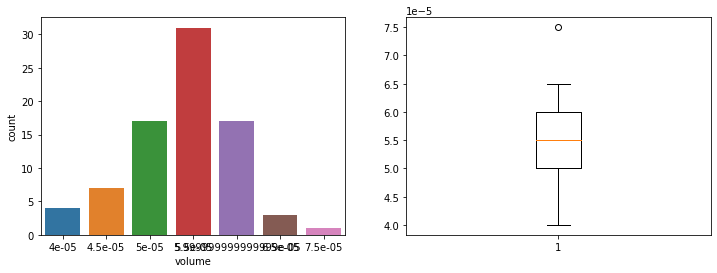

In [156]:
#Univariate analysis volume.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x = "volume", data = df)

f.add_subplot(1,2,2)
plt.boxplot(df['volume'])

plt.show()

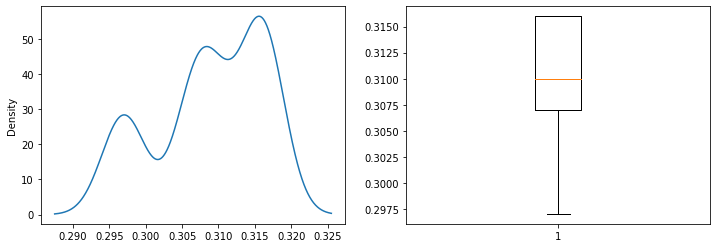

In [157]:
#Univariate analysis jarak

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['jarak'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['jarak'])

plt.show()

<Figure size 720x576 with 0 Axes>

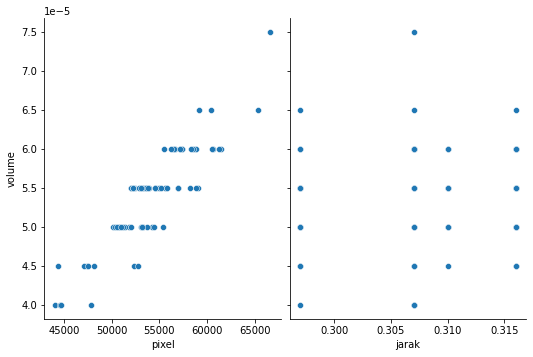

In [158]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['pixel', 'jarak'], y_vars=['volume'], height=5, aspect=0.75)

In [159]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df.corr().style.background_gradient().set_precision(2)

C:\Users\acer\AppData\Local\Temp/ipykernel_21524/1563951346.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,pixel,volume,jarak
pixel,1.00,0.89,-0.26
volume,0.89,1.00,0.12
jarak,-0.26,0.12,1.00


## Modelling dan melihat akurasi prediksi

In [160]:
#variabel x dan y.
x = df.drop(columns='volume')
y = df['volume']

#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

#object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train.values, y_train.values)

#nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.40363450e-09 3.42500666e-04]
-0.00012790164117460097


## Uji akurasi machine learning
Didapat akurasi sebesar 91%

In [161]:
#Accuracy score dengan data test
lin_reg.score(x_test.values, y_test.values)

0.9154566469165648

## Memprediksi volume

In [162]:
lin_reg.predict([[53078, 0.307]])

array([5.17481754e-05])